# 비선형추정 (2)

## 커널 밀도 추정(KDE)

-   히스토그램의 단점 : 연속형 자료 → 이산형 자료
-   이대로 분포를 추정하면 뭔가 잘 맞지 않는다.
-   이를 극복하기 위해 커널 밀도 추정을 활용

## 커널 밀도 추정 : 특징

-   비모수적인 방법이다.
-   연속형 자료에만 적용한다.
-   샘플을 커널함수에 넣고, 다 더한 뒤 샘플 수 $\times$ h 로 나눠 분포를 만든다.

$$
\hat f_h(x) = \dfrac{1}{nh} \sum_{i=1}^{n}~
K\bigg(\dfrac{x-x_i}{h}\bigg)
$$

$n$ = 표본 수.

$K$ = 커널함수.

-   특정 분포로 만들어주는 함수
-   정규분포, 균등분포 등등

$h$ = 대역폭(bandwidth)

-   커널의 모수를 평활화(smoothing parameter)
-   모수를 변화시켜주기 때문에 hist의 모양이 바뀐다.

## Boxplot과 이상치

**Boxplot (상자그림)**

-   상자그림을 그리기 위해서는 quantile이 필요.
-   IQR (interquartile range): 전체 데이터의 50%를 찾아내는 기법

$$
IQR = q(0.75) - q(0.25)
$$

**이상치 다루기**

-   상자그림의 최대 단점 : 이상치
-   이상치를 구분짓는 기준 : Adjacent Values(근접값)
-   보통 LL과 UL은 다음 방식으로 설정한다.

$$
\begin{align*}
LL &= q(0.25) - 1.5 \times IQR \\ 
UL &= q(0.25) + 1.5 \times IQR 
\end{align*}
$$ \## Quantile plot - 사분위수 기반의 그림은 이론적인 분포와 샘플을 비교하는데 좋다.
ex) 회귀분석 → 잔차가 정규분포를 따르는지 확인!

## probability plot

한 축에는 $$x_i$$들을, 다른 축에는 $F^{-1}\bigg(\dfrac{i-0.5}{n}\bigg)$ 을 놓는다.
1.
샘플 cdf의 역함수인 empirical distirbution을 그린다.
(Empirical distribution은 step function의 형태) 2.
또, 정규분포의 역함수를 그래프에 그린다.
3.
둘을 비교해 본다.

## Q-Q plot

-   probability plot = Q-Q plot의 특정한 형태
-   단, 두 랜덤 샘플을 비교해서 결과를 얻는 것임을 생각해야 한다.
-   샘플 사이즈가 작으면 생각보다 결과가 좋지 않을 수 있다.

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
from matplotlib import rcParams
import scipy.stats as stats
import platform

In [34]:
# 운영 체제에 따라 한글 폰트 설정
os_name = platform.system()
if os_name == 'Darwin':  # macOS
    rcParams['font.family'] = 'AppleGothic'
elif os_name == 'Windows':
    rcParams['font.family'] = 'Malgun Gothic'
else:  # Linux
    rcParams['font.family'] = 'NanumGothic'

In [35]:
# 데이터 생성
np.random.seed(0)
data = np.random.normal(loc=0, scale=1, size=1000)  # 평균 0, 표준편차 1의 정규분포 데이터

# KDE 수행 함수
def kde_with_bandwidth(data, bandwidth):
    kde = gaussian_kde(data, bw_method=bandwidth)
    return kde

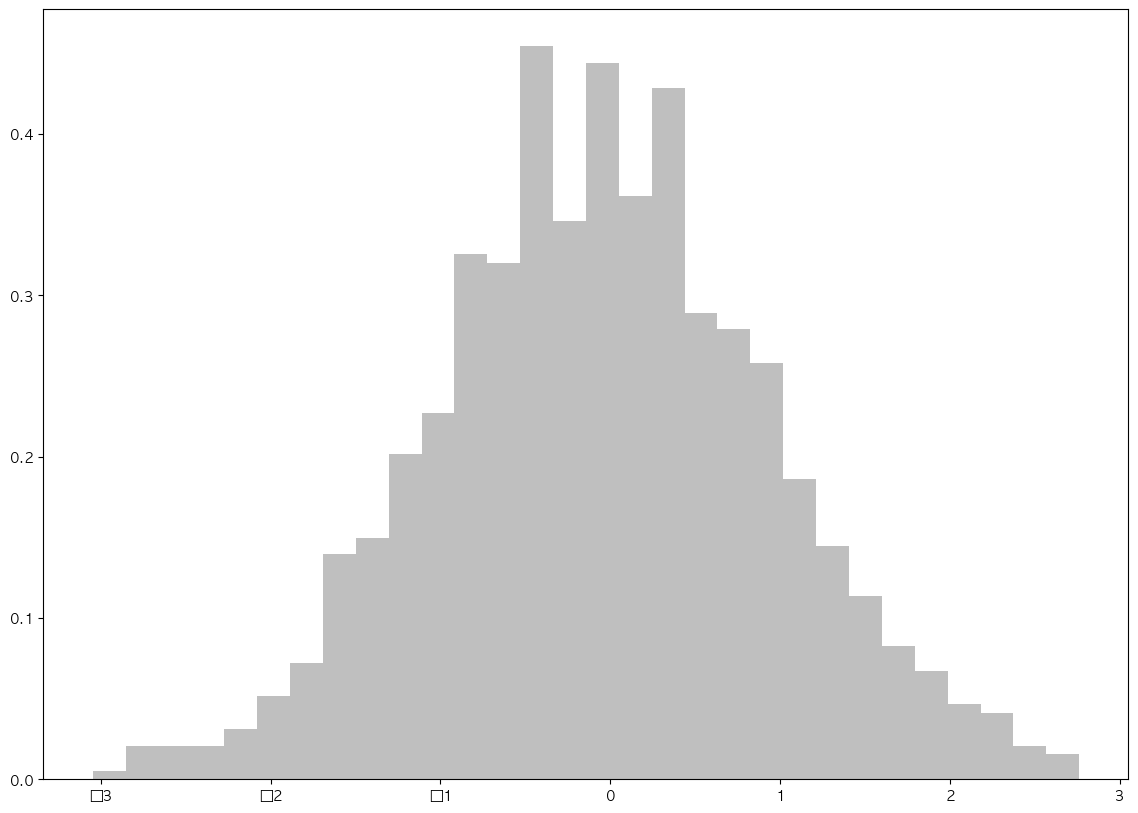

In [36]:
# 플로팅
plt.figure(figsize=(14, 10))

# 실제 데이터 히스토그램
_ = plt.hist(data, bins=30, density=True, alpha=0.5, color='gray', label='실제 데이터 히스토그램')

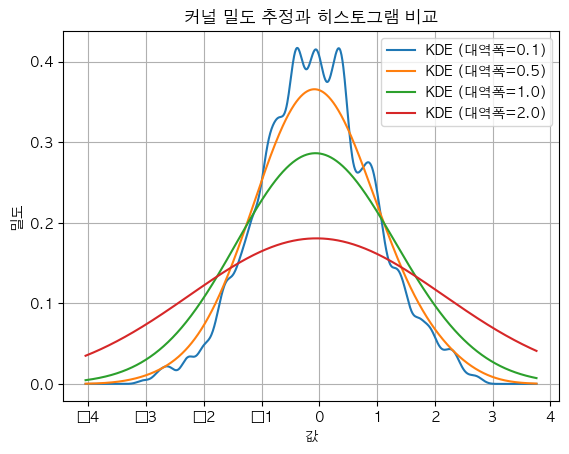

In [37]:
# 대역폭 리스트
bandwidths = [0.1, 0.5, 1.0, 2.0]
# KDE 플로팅
x = np.linspace(data.min() - 1, data.max() + 1, 1000)
for bandwidth in bandwidths:
    kde = kde_with_bandwidth(data, bandwidth)
    plt.plot(x, kde(x), label=f'KDE (대역폭={bandwidth})')

plt.xlabel('값')
plt.ylabel('밀도')
plt.title('커널 밀도 추정과 히스토그램 비교')
plt.legend()
plt.grid(True)
plt.show()

## 박스플롯과 kde
데이터가 들어갈 빈 행렬을 우선 만든다.

In [38]:
# 데이터 생성을 위한 빈 행렬
n_samples = 1000
n_features = 3
data_matrix = np.empty((n_samples, n_features))

빈 행렬 속 각 열에 데이터를 채워넣는다.
1. 정규분포에서 추출
2. 균등분포에서 추출 + 이상치 첨가
3. 정규분포 3개를 혼합

In [39]:
# 1. 정규분포에서 추출
data_matrix[:, 0] = np.random.normal(loc=0, scale=1, size=n_samples)

# 2. 균등분포에서 추출 + 이상치 첨가
uniform_data = np.random.uniform(low=-2, high=2, size=n_samples - 50)  # 950개
outliers = np.random.uniform(low=-5, high=5, size=50)  # 50개 이상치
data_matrix[:, 1] = np.concatenate([uniform_data, outliers])
np.random.shuffle(data_matrix[:, 1])  # 데이터 섞기

# 3. 정규분포 3개를 혼합
data1 = np.random.normal(loc=-2, scale=0.5, size=n_samples // 3)
data2 = np.random.normal(loc=0, scale=1, size=n_samples // 3)
data3 = np.random.normal(loc=2, scale=0.5, size=n_samples - 2 * (n_samples // 3))  # 남은 개수로 조정
data_matrix[:, 2] = np.concatenate([data1, data2, data3])
np.random.shuffle(data_matrix[:, 2])  # 데이터 섞기

각 열의 커널밀도를 추정한다.  
이후 시각화 진행.

/Users/inchoi/Statistics/code2_eda/myenv/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  func(*args, **kwargs)
/Users/inchoi/Statistics/code2_eda/myenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


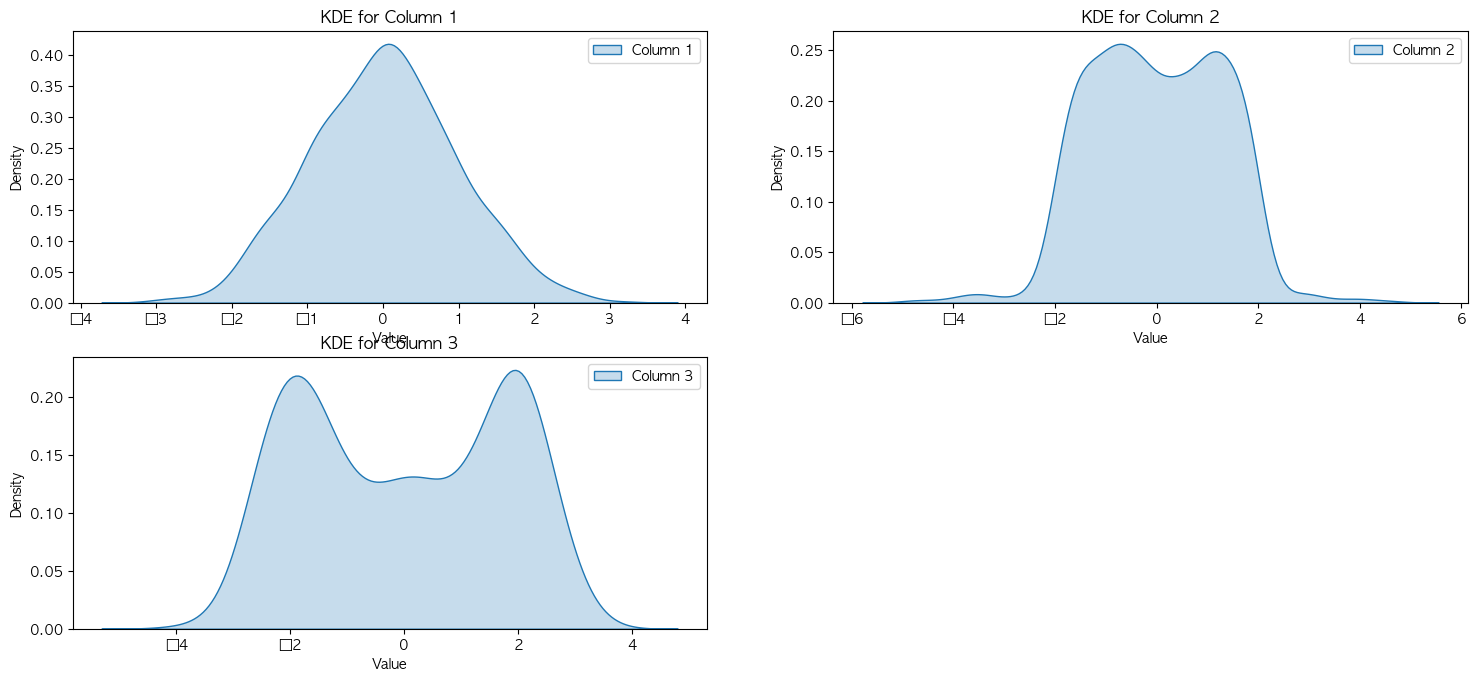

In [43]:
# KDE 수행 및 시각화
plt.figure(figsize=(18, 12))

# KDE 플로팅
for i in range(n_features):
    plt.subplot(3, 2, i + 1)
    sns.kdeplot(data_matrix[:, i], label=f'Column {i + 1}', fill=True)
    plt.title(f'KDE for Column {i + 1}')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()

## Q-Q plot 보기
확률을 얻고, 이론적으로 표준정규분포에 어디에 매칭되는지 확인.

/var/folders/j5/2p33mq0s3pbg5spm_mqqxgw00000gn/T/ipykernel_12842/1025324003.py:8: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  plt.tight_layout()


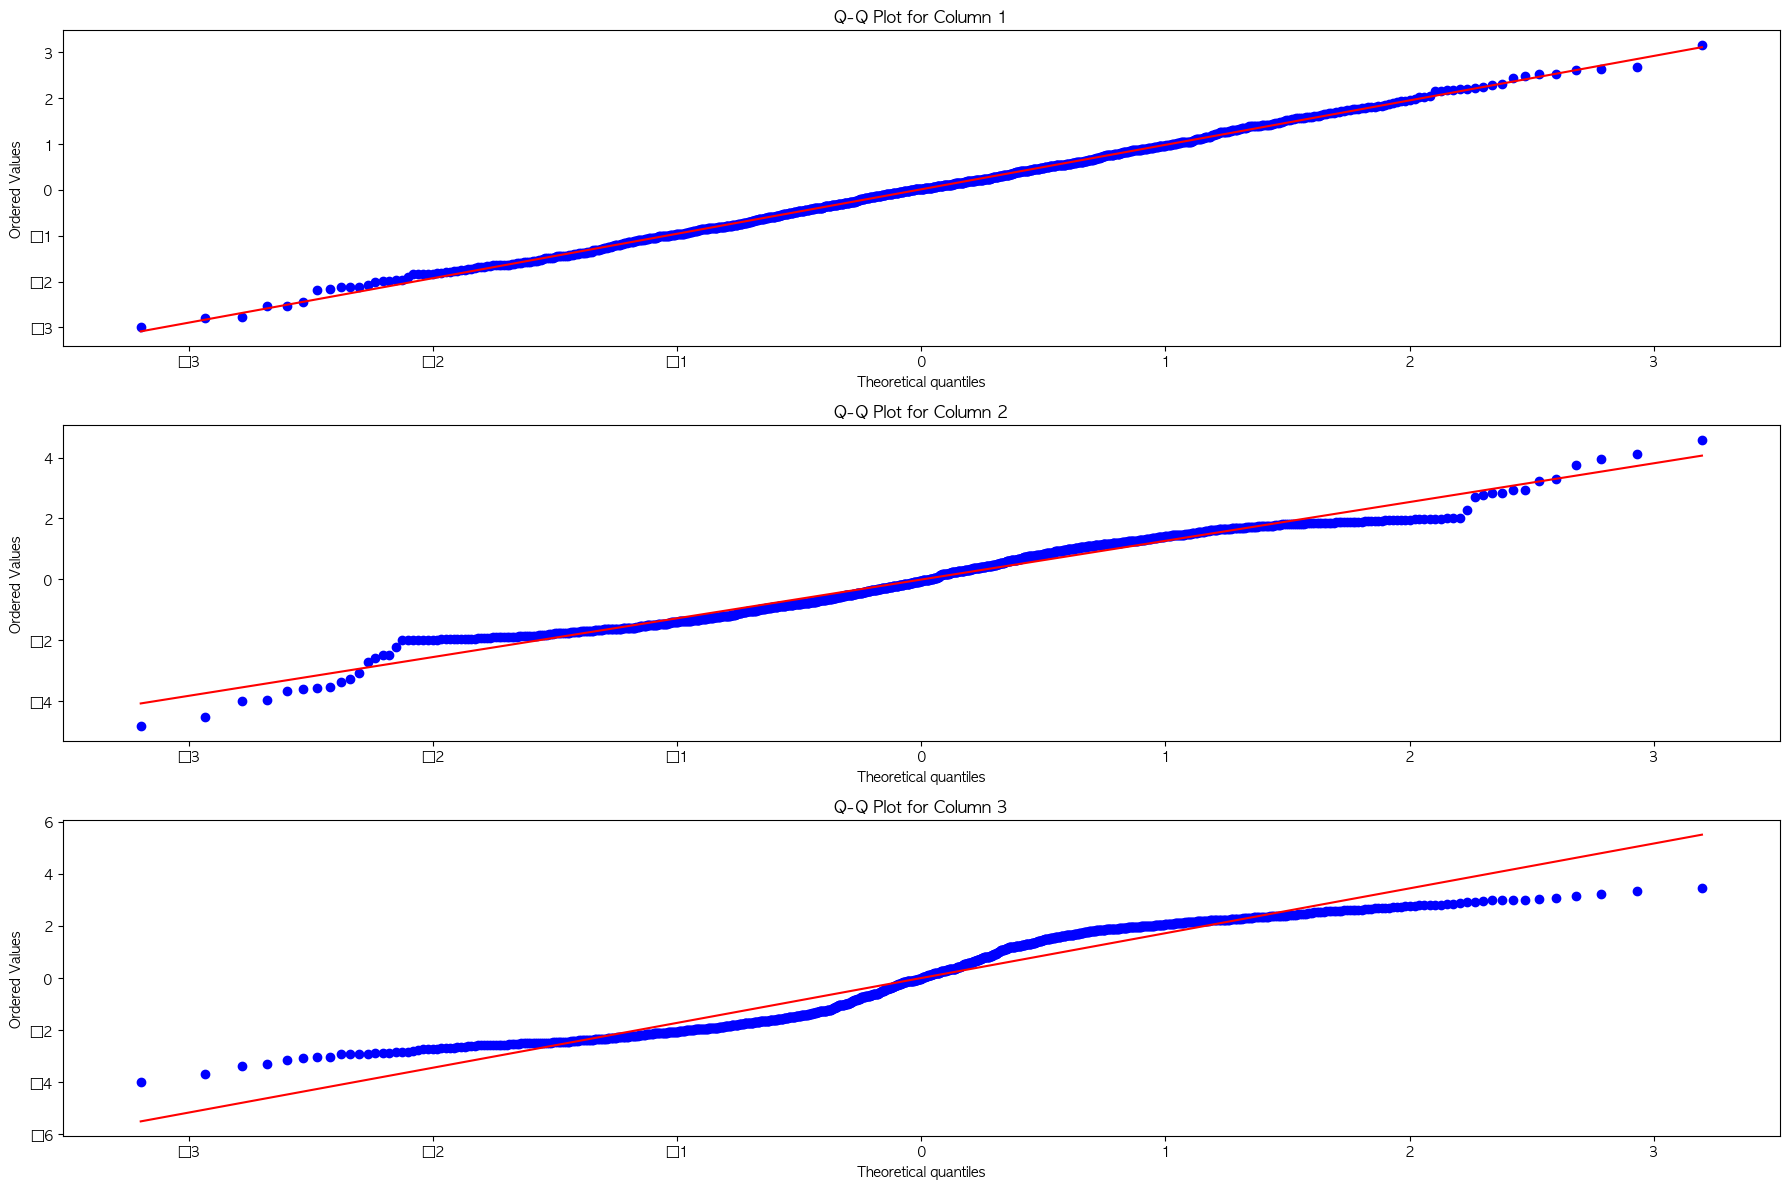

In [42]:
# Q-Q 플롯
plt.figure(figsize=(18, 12))
for i in range(n_features):
    plt.subplot(3, 1, i + 1)
    stats.probplot(data_matrix[:, i], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for Column {i + 1}')

plt.tight_layout()
plt.show()

이론적인 분포와 정렬 데이터를 비교해보자.

/var/folders/j5/2p33mq0s3pbg5spm_mqqxgw00000gn/T/ipykernel_12842/667357763.py:20: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  plt.tight_layout()


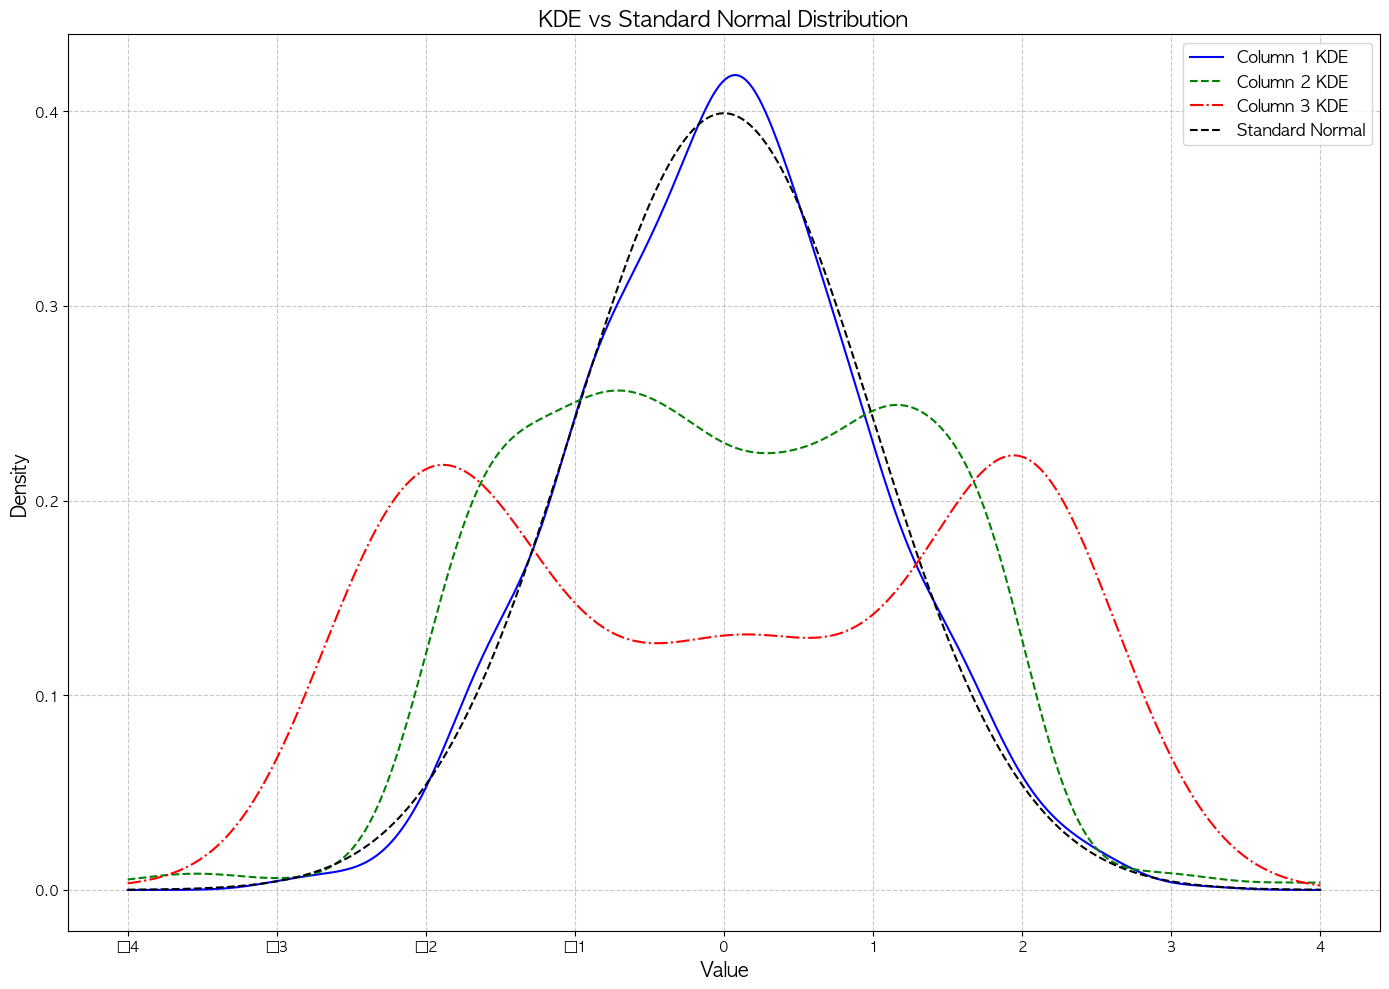

In [45]:
# KDE 플로팅
plt.figure(figsize=(14, 10))
x = np.linspace(-4, 4, 1000)
colors = ['blue', 'green', 'red']
linestyles = ['-', '--', '-.']

for i in range(n_features):
    kde = stats.gaussian_kde(data_matrix[:, i])
    plt.plot(x, kde(x), color=colors[i], linestyle=linestyles[i], label=f'Column {i + 1} KDE')
    
# 이론적 정규분포
plt.plot(x, stats.norm.pdf(x, loc=0, scale=1), color='black', linestyle='--', label='Standard Normal')

plt.title('KDE vs Standard Normal Distribution', fontsize=16)
plt.xlabel('Value', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()